## Implementation

In [1]:
from IOHMM import IOHMM_model
import numpy as np, pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/Financial-Data/stocks/TSLA.csv")
data.head()
data = data.dropna()

input = torch.tensor(np.array(data[['Open']]), dtype=torch.float32)
output = torch.tensor(np.array(data['Close']), dtype=torch.float32)

# Example 1

## Set up a simple model manully

In [3]:
xx=np.arange(0,100,0.1)
y= np.sin(xx)
inputs=torch.tensor(xx, dtype=torch.float32)
outputs=torch.tensor(y, dtype=torch.float32)
inputs=inputs.reshape(-1,1)

In [4]:
transition_matrix = torch.tensor([[[1.,0.],[1.,0.]],[[1.,0.],[1.,0.]]])
emission_matrix = torch.tensor([[-0.1,0.1],[0.1,0.1]])

IOHMM = IOHMM_model(num_states=2, inputs=input[:10], outputs=output[:10], max_iter=100, tol=1e-4, transition_matrix=transition_matrix, emission_matrix=emission_matrix)
print(f"initial pi {IOHMM.initial_pi}")
print(IOHMM.transition_matrix)
print(IOHMM.emission_matrix)
print(IOHMM.log_sd)

NameError: name 'storch' is not defined

In [ ]:
print(IOHMM._forward())
# torch.sum(IOHMM._forward(), dim=1)

tensor([[-0.6468, -0.7417],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan]])


In [ ]:
print(IOHMM._backward())
# torch.sum(IOHMM._backward(), dim=1)

tensor([[    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [    nan,     nan],
        [-0.6624, -0.7249]])


In [ ]:
print(IOHMM._compute_gamma(IOHMM._forward(), IOHMM._backward()))
# torch.sum(IOHMM._compute_gamma(IOHMM._forward(), IOHMM._backward()), dim=1)

tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]])


In [ ]:
print(IOHMM._compute_xi(IOHMM._forward(), IOHMM._backward()))
# torch.sum(IOHMM._compute_xi(IOHMM._forward(), IOHMM._backward()), axis=1)

tensor([[[nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan]],

        [[nan, nan],
         [nan, nan]]])


In [ ]:
IOHMM._baum_welch()

Iteration 1, likelihood: -inf


/home/alessandro/anaconda3/envs/env_1/lib/python3.12/site-packages/torch/autograd/__init__.py:251: UserWarning: Error detected in MulBackward0. Traceback of forward call that caused the error:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/alessandro/anaconda3/envs/env_1/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/alessandro/anaconda3/envs/env_1/lib/python3.12/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/alessandro/anaconda3/envs/env_1/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/home/alessandro/anaconda3/envs/env_1/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 195, in start
    self.asyncio_loop.run_forever()
  File "/home/alessandro/anaconda3/envs/env_1/lib/python3.12/asyncio/base_events.py", line 638

RuntimeError: Function 'MulBackward0' returned nan values in its 1th output.

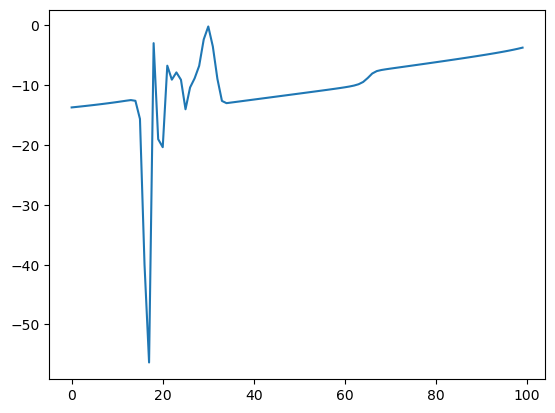

In [ ]:
plt.plot(IOHMM.history)

## See the training results

In [ ]:
print("Initial pi")
print(IOHMM.initial_pi) # to normalize
print("Transition matrix")
print(IOHMM.transition_matrix)
print("Emission matrix")
print(IOHMM.emission_matrix)
print("Sd")
print(IOHMM.log_sd)

Initial pi
Parameter containing:
tensor([7.3715, 1.2422], requires_grad=True)
Transition matrix
Parameter containing:
tensor([[[-0.4728, -0.6457],
         [-0.4057, -0.7092]],

        [[-0.4517, -0.4766],
         [-0.3075, -0.6029]]], requires_grad=True)
Emission matrix
Parameter containing:
tensor([[-1.1434, -2.7427],
        [-4.3170, -5.2228]], requires_grad=True)
Sd
Parameter containing:
tensor([-0.1111, -1.2753], requires_grad=True)


## Viterbi

In [ ]:
#call the viterbi algorithm
IOHMM.viterbi()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Predict

In [ ]:
# predict the next output given the next input
IOHMM.predict(input[11])


tensor(-9.6765, grad_fn=<SumBackward0>)

In [ ]:
output[11]

tensor(1.3260)